<a href="https://colab.research.google.com/github/kurrosan/ComputerLanguage/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%BF%D0%BE_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B9_%D0%BB%D0%B8%D0%BD%D0%B3%D0%B2%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B5_%D0%B8_%D0%BE%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B5_%D0%B5%D1%81%D1%82%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D1%8F%D0%B7%D1%8B%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
df=pd.read_csv('../input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv')
df.head(5)

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
# Получение списка категорий из столбца "category" фрейма данных
dist = list(df.category)

# Инициализация списка для подсчета количества элементов в каждой категории
pp = [0, 0, 0]

# Проход по списку категорий и увеличение счетчиков соответствующих категорий
for i in dist:
    if i == -1:
        pp[0] += 1  # Увеличение счетчика для категории -1
    elif i == 0:
        pp[1] += 1  # Увеличение счетчика для категории 0
    else:
        pp[2] += 1  # Увеличение счетчика для остальных категорий

# Вывод результата подсчета
print(pp)




[8277, 13142, 15830]


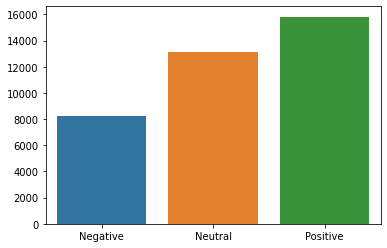

In [ ]:
labels=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=pp)
plt.show()

In [ ]:
comment=list(df.clean_comment.astype(str))
sentiment=list(df.category)
reddit_dict=dict(zip(comment,sentiment))

In [ ]:
print(list(reddit_dict.items())[:5])

[(' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness equanimity acceptance and compassion have developed all the things buddhism teaches ', 1), ('buddhism has very much lot compatible with christianity especially considering that sin and suffering are almost the same thing suffering caused wanting things shouldn want going about getting things the wrong way christian this would mean wanting things that don coincide with god will and wanting things that coincide but without the aid jesus buddhism could also seen proof god all mighty will and omnipotence certainly christians are lucky have one such christ there side but what about everyone else well many christians believe god grace salvation and buddhism god way showing grace upon others would also help study the things jesus said and see how buddha has made similar claims such rich man getting into heaven joke 

In [ ]:
Neg_list=[]
Pos_list=[]
Neutral_list=[]
for i,j in reddit_dict.items():
    if j==-1:
        Neg_list.append(i)
    elif j==0:
        Neutral_list.append(i)
    else:
        Pos_list.append(i)

In [ ]:
print(Neg_list[:2],'\n',Neutral_list[:2],'\n',Pos_list[:2])

['seriously don say thing first all they won get its too complex explain normal people anyway and they are dogmatic then doesn matter what you say see mechante post and for any reason you decide later life move from buddhism and that doesn suit you identity though you still get keep all the wisdom then your family will treat you like you went through weird hippy phase for while there didncha and you never hear the end pro tip don put one these your wall jpg ', 'you should all sit down together and watch the simpsons episode where lisa becomes buddhist simpsons season episode she little faith then discuss '] 
 ['what you have learned yours and only yours what you want teach different focus the goal not the wrapping paper buddhism can passed others without word about the buddha ', 'jesus was zen meets jew '] 
 [' family mormon have never tried explain them they still stare puzzled from time time like some kind strange creature nonetheless they have come admire for the patience calmness e

In [ ]:
pos_len=[]
for i in Pos_list:
    pos_len.append(len(i))

In [ ]:
neg_len=[]
for i in Neg_list:
    neg_len.append(len(i))

In [ ]:
Neutral_len=[]
for i in Neutral_list:
    Neutral_len.append(len(i))

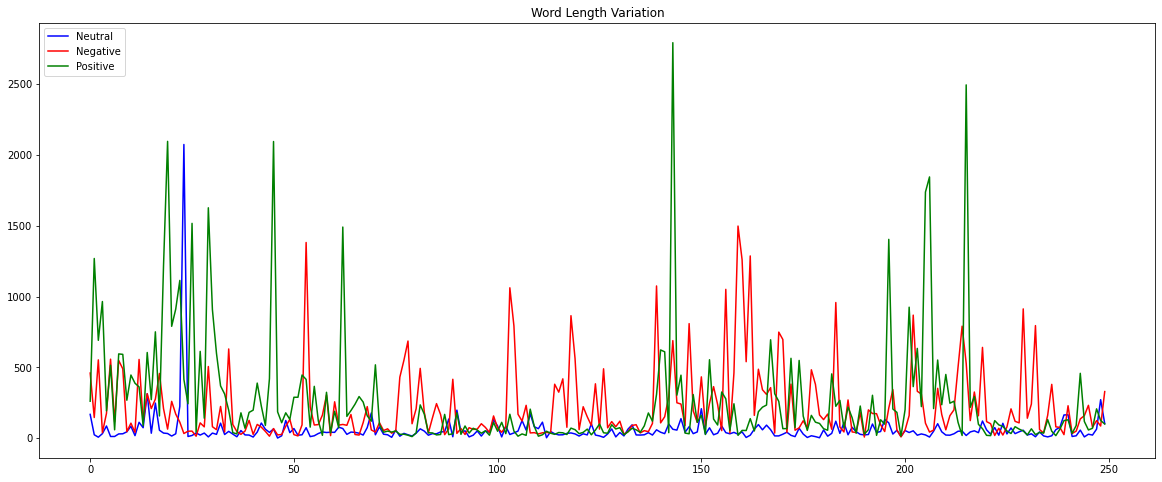

In [ ]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(20, 8))

plt.title("Word Length Variation")

# Построение линий для длины слов для каждой из категорий
# синим цветом для Neutral, красным для Negative и зеленым для Positive
plt.plot(Neutral_len[:250], c='b', label='Neutral')
plt.plot(neg_len[:250], c='r', label='Negative')
plt.plot(pos_len[:250], c='g', label='Positive')

plt.legend(loc='upper left')

plt.show()


In [ ]:
# Вычисление среднего значения длины слов для категории Positive
pos_mean = sum(pos_len) // len(pos_len)

# Вычисление среднего значения длины слов для категории Negative
neg_mean = sum(neg_len) // len(neg_len)

# Вычисление среднего значения длины слов для категории Neutral
neutral_mean = sum(Neutral_len) // len(Neutral_len)

# Вычисление общего среднего значения длины слов
combined_mean = (sum(pos_len) + sum(neg_len) + sum(Neutral_len)) // (len(pos_len) + len(neg_len) + len(Neutral_len))


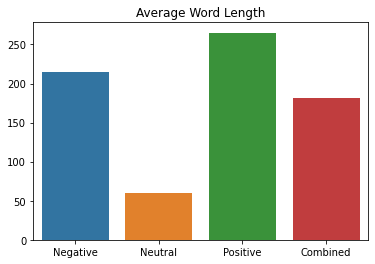

In [ ]:
plt.title("Average Word Length")
sns.barplot(x=['Negative','Neutral','Positive','Combined'],y=[neg_mean,neutral_mean,pos_mean,combined_mean])
plt.show()

In [ ]:
X=df['clean_comment'].astype('str')
X[:5]

0     family mormon have never tried explain them t...
1    buddhism has very much lot compatible with chr...
2    seriously don say thing first all they won get...
3    what you have learned yours and only yours wha...
4    for your own benefit you may want read living ...
Name: clean_comment, dtype: object

In [ ]:
lp=""
for i in X:
    lp+=i+" "
print(lp[:100])

 family mormon have never tried explain them they still stare puzzled from time time like some kind 


In [ ]:
st=lp.split(' ')
dict_len=len(set(st))

In [ ]:
dict_len,len(st)

(55543, 1134781)

In [ ]:
tokenizer=Tokenizer(num_words=dict_len,lower=True,oov_token="OOV")
tokenizer.fit_on_texts(X)

In [ ]:
len(tokenizer.word_index)


54720

In [ ]:
X_train=tokenizer.texts_to_sequences(X)
X_train_padded=pad_sequences(X_train,maxlen=175,padding='post',truncating='post')

In [ ]:
X_train[:2]

[[255,
  27343,
  11,
  123,
  642,
  871,
  40,
  10,
  95,
  12295,
  16336,
  24,
  54,
  54,
  22,
  43,
  290,
  4165,
  14016,
  7561,
  10,
  11,
  129,
  3150,
  6,
  2,
  5394,
  19936,
  11063,
  6437,
  3,
  4417,
  11,
  1440,
  19,
  2,
  112,
  1519,
  8055],
 [1519,
  20,
  78,
  73,
  83,
  7127,
  12,
  2851,
  454,
  1144,
  4,
  7128,
  3,
  1710,
  8,
  383,
  2,
  45,
  93,
  1710,
  1857,
  2984,
  112,
  961,
  91,
  88,
  26,
  191,
  112,
  2,
  202,
  79,
  1320,
  5,
  36,
  263,
  2984,
  112,
  4,
  39,
  19937,
  12,
  303,
  14,
  3,
  2984,
  112,
  4,
  19937,
  13,
  182,
  2,
  2852,
  2381,
  1519,
  120,
  60,
  246,
  709,
  303,
  19,
  5184,
  14,
  3,
  19938,
  1407,
  1469,
  8,
  2382,
  11,
  31,
  102,
  4290,
  28,
  363,
  13,
  17,
  26,
  190,
  285,
  76,
  92,
  1469,
  198,
  303,
  6438,
  11064,
  3,
  1519,
  303,
  79,
  891,
  6438,
  1145,
  280,
  36,
  60,
  228,
  1520,
  2,
  112,
  2381,
  87,
  3,
  67,
  33,
  882,
  20,

In [ ]:
df['category']=df['category'].replace({-1:2})

In [ ]:
mp={0:"Neutral",1:"Positve",2:"Negative"}

In [ ]:
Y=df['category'].values

In [ ]:
Y_hot=to_categorical(Y)

In [ ]:
print(Y_hot[:3])

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Bidirectional, Dropout, Dense

# Создание пустой последовательной модели
model = Sequential()

# Добавление слоя Embedding для преобразования индексов слов в векторы фиксированной размерности (64)
# input_length=175 указывает максимальную длину входных последовательностей
model.add(Embedding(dict_len, 64, input_length=175))

# Добавление слоя Dropout для регуляризации и предотвращения переобучения (отсев 30% нейронов)
model.add(Dropout(0.3))

# Добавление слоя Bidirectional LSTM (175 нейронов), который обрабатывает последовательности в обоих направлениях
# return_sequences=True указывает, что этот слой возвращает последовательности для следующего слоя
model.add(Bidirectional(LSTM(175, return_sequences=True)))

# Добавление слоя Dropout для регуляризации
model.add(Dropout(0.3))

# Добавление еще одного слоя Bidirectional LSTM (350 нейронов) с возвращением последовательностей
model.add(Bidirectional(LSTM(350, return_sequences=True)))

# Добавление слоя Dropout для регуляризации
model.add(Dropout(0.3))

# Добавление еще одного слоя Bidirectional LSTM (700 нейронов) без возвращения последовательностей
model.add(Bidirectional(LSTM(700)))

# Добавление полносвязного слоя с 3 нейронами и функцией активации softmax для классификации на 3 класса
model.add(Dense(3, activation='softmax'))

# Вывод краткой информации о модели
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 175, 64)           3554752   
_________________________________________________________________
dropout (Dropout)            (None, 175, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 175, 350)          336000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 175, 350)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 175, 700)          1962800   
_________________________________________________________________
dropout_2 (Dropout)          (None, 175, 700)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1400)              7

In [ ]:
# Компиляция модели с оптимизатором 'adam', функцией потерь 'categorical_crossentropy'
# и метрикой 'accuracy' для оценки производительности модели в процессе обучения.
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')



In [ ]:
hist=model.fit(X_train_padded,Y_hot,epochs=5,validation_split=0.2)

Epoch 1/5
932/932 [==============================] - 190s 190ms/step - loss: 0.7818 - accuracy: 0.6583 - val_loss: 0.3055 - val_accuracy: 0.8985
Epoch 2/5
932/932 [==============================] - 176s 189ms/step - loss: 0.2382 - accuracy: 0.9206 - val_loss: 0.2197 - val_accuracy: 0.9295
Epoch 3/5
932/932 [==============================] - 176s 189ms/step - loss: 0.1335 - accuracy: 0.9582 - val_loss: 0.3395 - val_accuracy: 0.8913
Epoch 4/5
932/932 [==============================] - 176s 189ms/step - loss: 0.1037 - accuracy: 0.9684 - val_loss: 0.2912 - val_accuracy: 0.9188
Epoch 5/5
932/932 [==============================] - 176s 189ms/step - loss: 0.0621 - accuracy: 0.9815 - val_loss: 0.3155 - val_accuracy: 0.9113


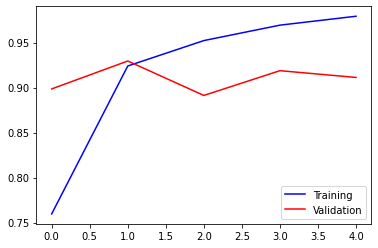

In [ ]:
plt.plot(hist.history['accuracy'],c='b',label='Training')
plt.plot(hist.history['val_accuracy'],c='r',label='Validation')
plt.legend(loc='lower right')
plt.show()

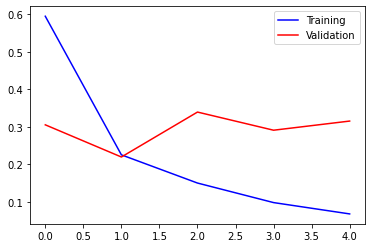

In [ ]:
plt.plot(hist.history['loss'],c='b',label='Training')
plt.plot(hist.history['val_loss'],c='r',label='Validation')
plt.legend(loc='upper right')
plt.show()

In [ ]:
def predict(s):
    X_tes=[]
    X_tes.append(s)
    X_test=tokenizer.texts_to_sequences(X_tes)
    X_test_padded=pad_sequences(X_test,maxlen=175,padding='post',truncating='post')
    sent=int(model.predict_classes(X_test_padded))
    print("The Predicted Sentiment is ",mp[sent])

In [ ]:
# @title Текст заголовка по умолчанию
text_of_song = "" # @param {type:"string"}
predict(text_of_song)